1:

The theoretical simple linear regression model is a statisical model used to predict the relationship between the independent and dependent variable using a straight line. The predictor is the independent variable, X, which we believe affects/influence the dependent variable. The outcome variable is the dependent variable, Y, which is the outcome based on the predictor. The intercept coefficient, beta 0, is the value of the outcome variable when the predictor is zero. It represents the point where the regression line crosses the Y-axis. The slope coefficient, beta 1, is the slope of the line which represents the change in the outcome variable for every change in the predictor variable. A positive slope means that as the predictor increases, the outcome also increases. The error term, sigma, makes simple linear regression a statistical model by introducing a random variable with a distribution. It accounts for the variation in the outcome that isn’t explained by the predictor. It captures random fluctuations and other influences on the outcome variable that aren't measured by the predictor variable.

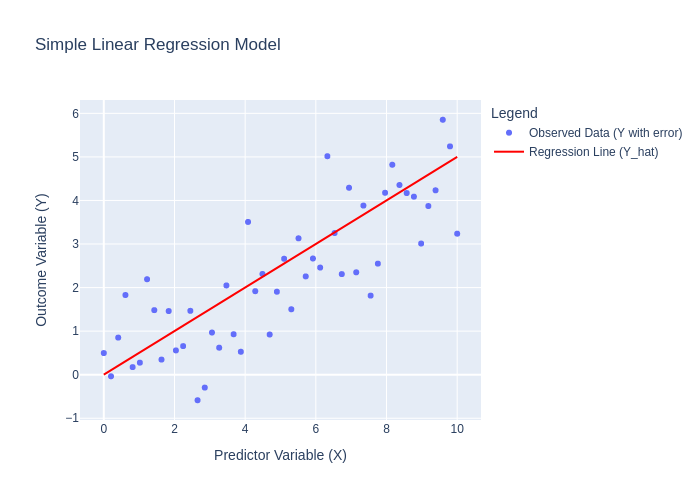

In [17]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

np.random.seed(42)

intercept = 0
slope = 0.5

std_dev_error = 1 

X = np.linspace(0, 10, 50) 

errors = norm.rvs(loc=0, scale=std_dev_error, size=X.shape[0])

Y = intercept + slope * X + errors

Y_hat = intercept + slope * X

fig = go.Figure()

fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Observed Data (Y with error)'))

fig.add_trace(go.Scatter(x=X, y=Y_hat, mode='lines', name='Regression Line (Y_hat)', line=dict(color='red')))

fig.update_layout(
    title="Simple Linear Regression Model",
    xaxis_title="Predictor Variable (X)",
    yaxis_title="Outcome Variable (Y)",
    legend_title="Legend"
)

fig.show(renderer="png")


2:

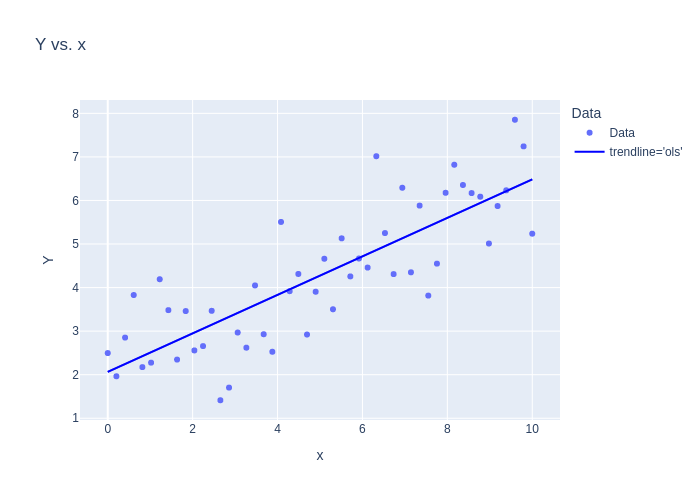

In [20]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf 
import plotly.express as px 
from scipy.stats import norm

np.random.seed(42)
intercept = 2  # β₀
slope = 0.5    # β₁
std_dev_error = 1

x = np.linspace(0, 10, 50)
errors = norm.rvs(loc=0, scale=std_dev_error, size=x.shape[0])
Y = intercept + slope * x + errors

df = pd.DataFrame({'x': x, 'Y': Y})

model_data_specification = smf.ols("Y ~ x", data=df) 
fitted_model = model_data_specification.fit() 

fitted_model.summary()
fitted_model.summary().tables[1]
fitted_model.params
fitted_model.params.values
fitted_model.rsquared

df['Data'] = 'Data' 
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png") 


3:

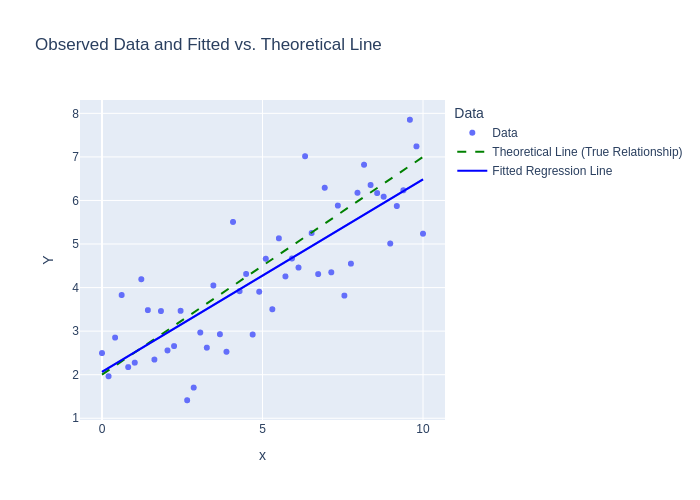

In [23]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
from scipy.stats import norm

np.random.seed(42)

intercept = 2  
slope = 0.5    
std_dev_error = 1

x = np.linspace(0, 10, 50)
errors = norm.rvs(loc=0, scale=std_dev_error, size=x.shape[0])
Y = intercept + slope * x + errors

df = pd.DataFrame({'x': x, 'Y': Y})

model_data_specification = smf.ols("Y ~ x", data=df) 
fitted_model = model_data_specification.fit() 

df['Theoretical_Y'] = intercept + slope * df['x']  
df['Data'] = 'Data'  

fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Observed Data and Fitted vs. Theoretical Line')

fig.add_scatter(x=df['x'], y=df['Theoretical_Y'],
                line=dict(color='green', dash='dash'), name="Theoretical Line (True Relationship)")

fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Fitted Regression Line")

fig.show(renderer="png")


The difference between the 2 lines is that the theoretical line will remain consistent, while the fitted line will depend on the sample and the simulation of random sampling. The theoretical line is the ideal line based on x and Y, and does not factor in the errors. 

4:

fitted_model.fittedvalues is derived by applying the regression equation to each X in the dataset, using the intercept and slope estimated by the model (fitted_model.params). The summary table or fitted_model.params gives us the necessary parameters (β₀ and β₁) to calculate each predicted 
𝑌
 .

5:

The ordinary least squares method chooses the line that minimizes the sum of squared residuals, which results in the "best fit" line. Squaring the residuals helps handle all deviations equally and mathematically simplifies finding the line that best represents the relationship in the data.

6:

expression:

1. If this proportion is high (close to 1), it means most of the variability in Y can be explained by the fitted values (predictions) of the model. If the proportion is low (close to 0), it suggests that the model does not capture much of the variation in Y. gives an indication of the goodness-of-fit of the model: how well the model explains the variability in Y. 

2. This expression does what the first expression, and in turn can be interpreted as a measure of the accuracy of the model because it will give an idea of how well the model is fitted. 

3. In Simple Linear Regression, R-squared can also be computed as the square of the correlation between the observed Y values and the fitted (predicted) values Y hat. This expression measures how closely the predicted values align with the actual observed values. 

4. Since Y hat is a linear function of x, this also yields R-squared in the context of Simple Linear Regression, capturing the linear association strength between x and Y.
 

7: 

A couple of assumptions that do not seem compatible with the example data are linearity and Homoscedasticity. It assumes linearity because the data shows that there are outliers and how the Y increases at a faster rate than x, showing that it could not be exactly linear. Furthermore, it assumes the Homoscedasticity as the variance of errors of Y increases with each x, showing heteroscedasticity. 

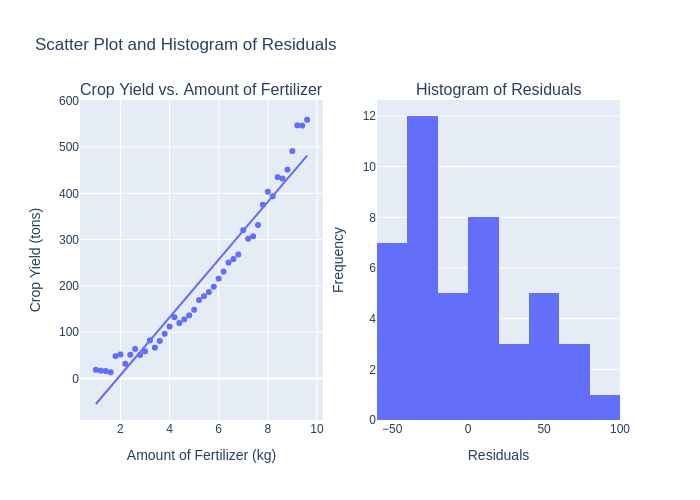

In [36]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

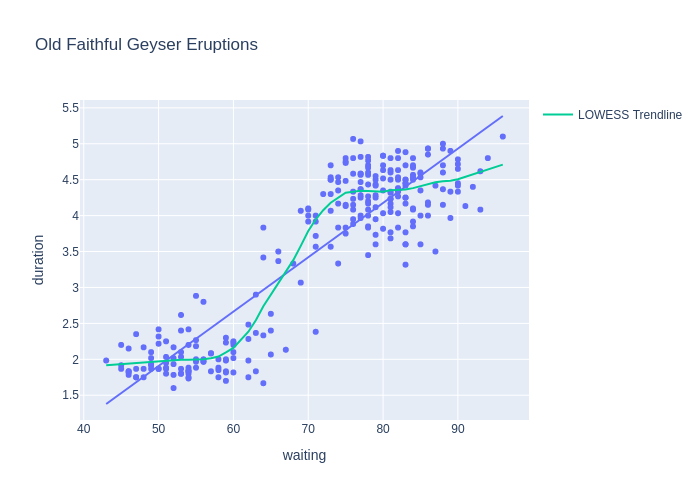

In [30]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

8:
    
Null hypothesis: There is no linear relationship between waiting time and eruption duration, implying that the slope of the regression line is zero. 

Alternative Hypothesis: There is a linear relationship between waiting time and eruption duration, so the slope  is not zero.

In [31]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        03:26:28   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for waiting in the model summary, which represents the estimated slope of the relationship between waiting time and eruption duration. The estimated slope is the p-value. If the p-value is low, you would infer that waiting time likely affects eruption duration in a linear manner, on average.
If the p-value is high, you might consider that waiting time does not linearly impact eruption duration and that a different model could better represent the data. 

9: 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


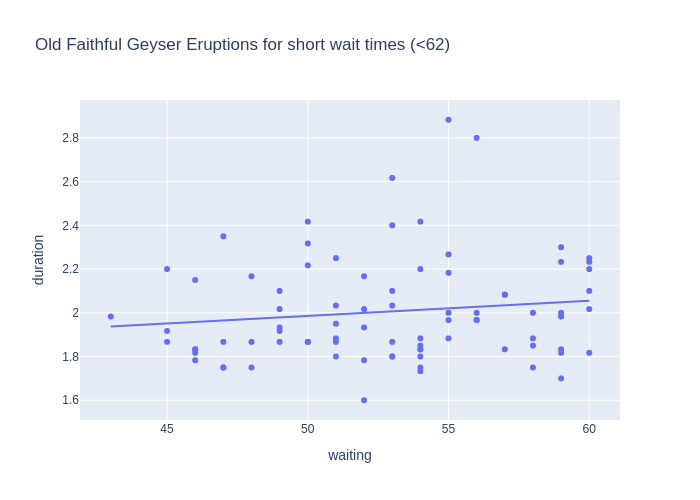

In [38]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

If the p-value for the slope is small (e.g.,p<0.05), it suggests evidence against the null hypothesis, implying a linear association between waiting time and eruption duration for the specified range of short wait times.
If the p-value is large, there is insufficient evidence to conclude a linear relationship within that range of wait times. As the threshold for short_wait_limit changes, the sample size and potentially the strength of any detected linear relationship also change.
If the evidence for a linear relationship is weaker or absent at lower thresholds (e.g., 62), this may indicate that the linear association primarily exists for longer wait times, suggesting that the relationship observed in the full dataset does not hold consistently across all shorter wait times.

10:

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


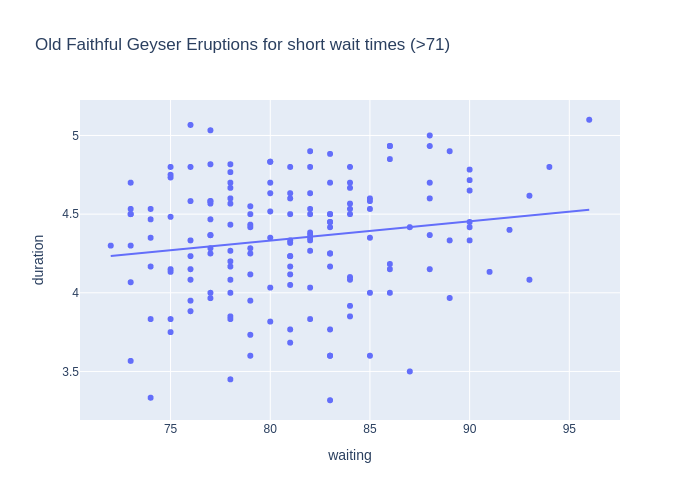

In [37]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png")

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.express as px

old_faithful = sns.load_dataset('geyser')
long_wait = old_faithful['waiting'] >= old_faithful['waiting'].nlargest(160).min()
n = 160

initial_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
observed_slope = initial_model.params['waiting']

bootstrap_slopes = []
n_bootstraps = 1000
for _ in range(n_bootstraps):
    bootstrap_sample = old_faithful[long_wait].sample(n, replace=True)
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrap_slopes.append(bootstrap_model.params['waiting'])

fig = px.histogram(bootstrap_slopes, nbins=30, title="Bootstrap Sampling Distribution of Slope Coefficients",
                   labels={'value': 'Slope Coefficient'})
fig.add_vline(x=observed_slope, line_dash="dash", line_color="red", annotation_text="Observed Slope")
fig.show()

simulated_slopes = []
beta_0 = initial_model.params['Intercept'] 
beta_1_null = 0 
sigma = initial_model.resid.std()  

for _ in range(n_bootstraps):
    simulated_duration = beta_0 + beta_1_null * old_faithful[long_wait]['waiting'] + \
                         np.random.normal(0, sigma, n)
    simulated_data = pd.DataFrame({'waiting': old_faithful[long_wait]['waiting'], 'duration': simulated_duration})
    
    simulated_model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    simulated_slopes.append(simulated_model.params['waiting'])

fig = px.histogram(simulated_slopes, nbins=30, title="Simulated Sampling Distribution of Slope Coefficients under H0",
                   labels={'value': 'Slope Coefficient'})
fig.add_vline(x=observed_slope, line_dash="dash", line_color="red", annotation_text="Observed Slope")
fig.show()

ci_lower, ci_upper = np.percentile(bootstrap_slopes, [2.5, 97.5])
print(f"95% Bootstrap Confidence Interval for Slope: ({ci_lower:.4f}, {ci_upper:.4f})")

slope_in_ci = ci_lower <= observed_slope <= ci_upper
print(f"Is the observed slope within the 95% CI? {'Yes' if slope_in_ci else 'No'}")

simulated_p_value = (np.sum(np.abs(simulated_slopes) >= np.abs(observed_slope)) / n_bootstraps)
print(f"Simulated p-value: {simulated_p_value:.4f}")

original_p_value = initial_model.pvalues['waiting']
print(f"Original model p-value: {original_p_value:.4f}")


95% Bootstrap Confidence Interval for Slope: (0.0014, 0.0224)
Is the observed slope within the 95% CI? Yes
Simulated p-value: 0.0520
Original model p-value: 0.0381


11:

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


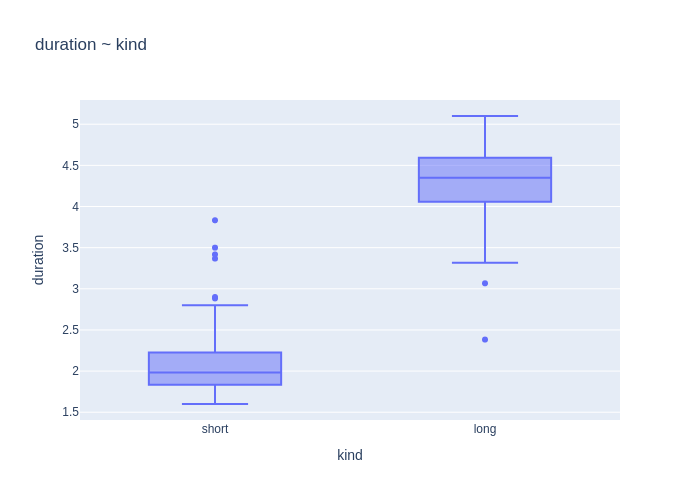

In [42]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

model 1: examines the linear relationship between waiting and duration across all observations. It assumes a single, continuous linear relationship applies to the entire dataset.

model 2 and 3: assumes that the relationship between waiting and duration may differ depending on the length of the wait.These models fit two different slopes for short and long wait times but do not directly compare the two categories in a unified framework. 

The Simple Linear Regression model specification using an indicator variable of the wait time length: uses an indicator variable (kind) to separate short and long wait times. It allows us to directly compare average eruption durations between the "short" and "long" categories. The model assumes that the difference in duration is an additive effect, which allows for a straightforward test of whether the duration differs on average between short and long wait times.


The big difference with the Simple Linear Regression model specification using an indicator variable of the wait time length and the previous models is that the direct comparisons between the variables gives a clearer test of the average difference between short and long wait times compared to the continuous and separated models. This setup allows us to assess whether the duration significantly differs on average based on categorized wait times. 


Interpretation of the New Model
Evidence Against the Null Hypothesis:

The regression output provides the coefficient for the long category (relative to the short reference group). The p-value associated with this coefficient tests the null hypothesis:
𝐻
0
:
There is no difference in average duration between short and long wait times.
H 
0
​
 :There is no difference in average duration between short and long wait times.
A small p-value (e.g., 
𝑝
<
0.05
p<0.05) for the long coefficient would indicate strong evidence against the null hypothesis, suggesting a statistically significant difference in eruption durations between short and long wait times.

12: 

Model 1 suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models. The other 3 models do not support the assumption because they display deviations due to limited data or model fit issues.

https://chatgpt.com/share/672d8bb3-bed4-8013-a937-1efef11fd554

https://chatgpt.com/share/672d81b3-2a08-8011-b426-b9bd7007e357